In [3]:
import wandb
import pandas as pd

In [2]:
api = wandb.Api()
project="subset-search-gpu-opt"
entity="johnny-gary"
runs = api.runs(entity + "/" + project)

In [4]:
summary_list, tags_list, name_list = [], [], []
for run in runs:
    summary_list.append(run.summary._json_dict)
    name_list.append(run.name)
    tags_list.append(run.tags)


runs_df = pd.DataFrame({
    "SUMMARY": summary_list,
    "NAME": name_list, 
    "TAGS": tags_list
    })


In [7]:
runs_df = runs_df[:120]

In [ ]:
"""
Train size 100
    seed 42-61
        roberta-large test performance (20)
        electra-small test performance (20)
"""

In [8]:
runs_df

,SUMMARY,NAME,TAGS
0,"{'run_time': 151.31, '_timestamp': 1665416658,...",toasty-serenity-179,"[61, correlation, google/electra-small-discrim..."
1,"{'run_time': 434.89, '_timestamp': 1665416498,...",faithful-valley-178,"[61, correlation, roberta-large, train_size-500]"
2,"{'sst:val_acc': 0.7629427792915532, 'sst2_fina...",major-snowball-177,"[60, correlation, google/electra-small-discrim..."
3,"{'loss': 2.387133463344071e-05, '_runtime': 84...",sunny-pine-176,"[60, correlation, roberta-large, train_size-500]"
4,"{'_runtime': 177, 'run_time': 174.18, '_timest...",confused-tree-175,"[59, correlation, google/electra-small-discrim..."
...,...,...,...
115,"{'_wandb': {'runtime': 429}, '_runtime': 430, ...",feasible-paper-64,"[44, correlation, roberta-large, train_size-100]"
116,"{'_step': 2110, '_wandb': {'runtime': 178}, 'r...",hearty-elevator-63,"[43, correlation, google/electra-small-discrim..."
117,"{'loss': 1.6122907254612073e-05, '_step': 1207...",spring-salad-62,"[43, correlation, roberta-large, train_size-100]"
118,"{'loss': 0.00135678518563509, '_wandb': {'runt...",rich-sea-61,"[42, correlation, google/electra-small-discrim..."


In [38]:
from typing import Tuple, List
def get_test_accs_for_all_seeds(train_size: int) -> Tuple[List[int], List[int]]:
    roberta_test_accs = {}
    electra_test_accs = {}
    for row in runs_df.iterrows():
        tags = set(row[1].TAGS)
        test_acc = row[1].SUMMARY['sst2_final_test:accuracy']
        seed = int(row[1].TAGS[0])
        if f"train_size-{train_size}" in tags and "correlation" in tags:
            if "roberta-large" in tags: 
                roberta_test_accs[seed] = test_acc
            elif "google/electra-small-discriminator" in tags: 
                electra_test_accs[seed] = test_acc
    roberta_test_accs_list = [roberta_test_accs[i] for i in range(42, 62)]
    electra_test_accs_list = [electra_test_accs[i] for i in range(42, 62)]
    return roberta_test_accs_list, electra_test_accs_list

spearman: SpearmanrResult(correlation=-0.1887005783566227, pvalue=0.4255940656439129)


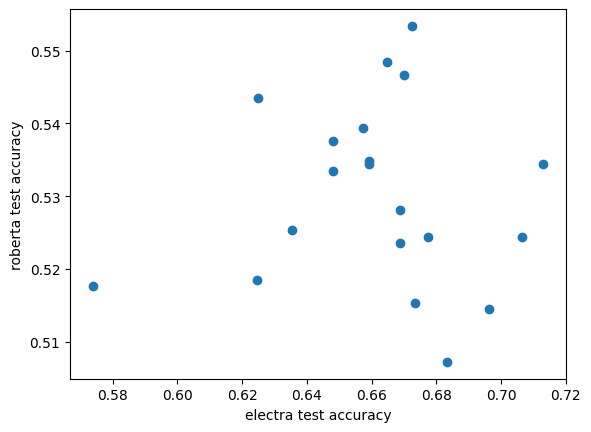

spearman: SpearmanrResult(correlation=0.10003761519786969, pvalue=0.6747553604289027)


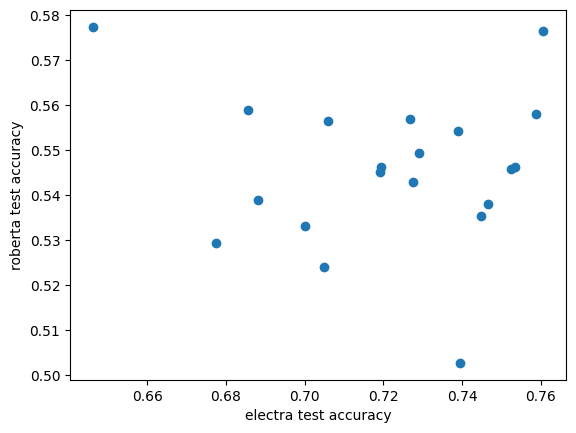

spearman: SpearmanrResult(correlation=0.06287650602409639, pvalue=0.7922833728412757)


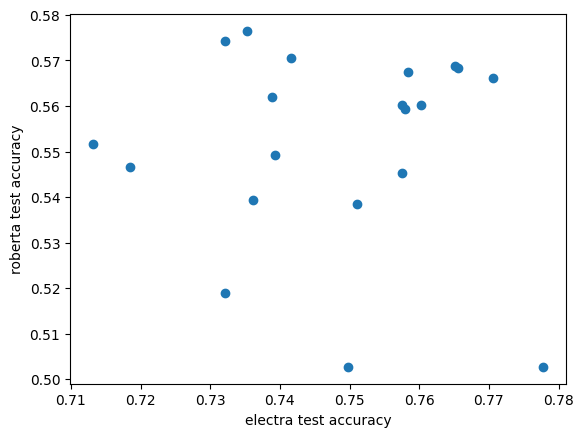

In [53]:
import scipy.stats
import matplotlib.pyplot as plt
for TRAIN_SIZE in (100, 300, 500):
    roberta_test_accs_list, electra_test_accs_list = get_test_accs_for_all_seeds(TRAIN_SIZE) 
    x = electra_test_accs_list
    y = roberta_test_accs_list
    assert len(x) == len(y) == 20
    spearman = scipy.stats.spearmanr(x, y)
    print(f"spearman: {spearman}")
    plt.scatter(x, y)
    plt.ylabel('roberta test accuracy')
    plt.xlabel('electra test accuracy')
    plt.show()